In [2]:
import xarray as xr
from skimage.morphology import skeletonize
from shapely.geometry import MultiPolygon
import geopandas as gpd
import rioxarray as rxr
import numpy as np
from matplotlib import pyplot as plt

In [3]:
gen_path = '/Users/emarshall/Desktop/siparcs/xr_book1/'

In [8]:
gen_path_home = '/Users/emmamarshall/Desktop/phd_research/siparcs/'
rgi_path_home = '/Users/emmamarshall/Downloads/15rgi60SouthAsiaEast'

## Read in vector data

In [9]:
#se_asia = gpd.read_file(gen_path_home[:-9] + 'data/nsidc0770_15.rgi60.SouthAsiaEast/15_rgi60_SouthAsiaEast.shp')
se_asia = gpd.read_file(rgi_path_home + '/15_rgi60_SouthAsiaEast.shp')


In [10]:
se_asia_prj = se_asia.to_crs('+proj=lcc +lat_1=15 +lat_2=65 +lat_0=30 +lon_0=95 +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m no_defs')
se_asia_prj

,RGIId,GLIMSId,BgnDate,EndDate,CenLon,CenLat,O1Region,O2Region,Area,Zmin,...,Aspect,Lmax,Status,Connect,Form,TermType,Surging,Linkages,Name,geometry
0,RGI60-15.00001,G102044E29941N,19990920,-9999999,102.044042,29.941000,15,3,0.438,4996,...,251,850,0,0,0,0,9,9,None,"POLYGON ((626747.322 19334.286, 626747.214 193..."
1,RGI60-15.00002,G102042E29987N,19990920,-9999999,102.042346,29.987019,15,3,0.644,4947,...,244,1021,0,0,0,0,9,9,None,"POLYGON ((626699.144 24673.098, 626701.110 246..."
2,RGI60-15.00003,G102041E29997N,19990920,-9999999,102.041130,29.997311,15,3,0.225,5019,...,274,812,0,0,0,0,9,9,None,"POLYGON ((626205.858 25396.784, 626210.489 254..."
3,RGI60-15.00004,G102050E29962N,19990920,-9999999,102.050283,29.962297,15,3,0.985,4622,...,52,2318,0,0,0,0,9,9,None,"POLYGON ((627054.150 21582.052, 627057.905 216..."
4,RGI60-15.00005,G102044E30025N,19990920,-9999999,102.043728,30.025101,15,3,0.465,4733,...,20,913,0,0,0,0,9,9,None,"POLYGON ((626913.162 28267.766, 626895.820 282..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13114,RGI60-15.13115,G081977E30337N,20090918,-9999999,81.977000,30.337000,15,1,1.356,5480,...,352,1856,0,0,0,0,9,9,CN5Z342A0003,"POLYGON ((-1150121.533 121963.660, -1150118.27..."
13115,RGI60-15.13116,G081991E30339N,20090918,-9999999,81.991000,30.339000,15,1,7.427,5266,...,330,5779,0,0,0,0,9,9,CN5Z342A0003,"POLYGON ((-1148353.222 121707.808, -1148328.34..."
13116,RGI60-15.13117,G081355E30440N,20070912,-9999999,81.355000,30.440000,15,1,6.788,5696,...,96,5519,0,0,0,0,9,9,CN5Z342B0006,"POLYGON ((-1204224.276 142125.331, -1204220.83..."
13117,RGI60-15.13118,G081361E30451N,20070912,-9999999,81.361000,30.451000,15,1,0.043,5969,...,206,527,0,0,0,0,9,9,None,"POLYGON ((-1202593.561 141849.818, -1202579.07..."


In [11]:
sample_glacier_prj = se_asia_prj.loc[se_asia_prj['RGIId'] == 'RGI60-15.11909']
sample_glacier_prj

,RGIId,GLIMSId,BgnDate,EndDate,CenLon,CenLat,O1Region,O2Region,Area,Zmin,...,Aspect,Lmax,Status,Connect,Form,TermType,Surging,Linkages,Name,geometry
11908,RGI60-15.11909,G096657E29334N,20050908,-9999999,96.657,29.334,15,3,179.589,3980,...,78,32403,0,0,1,0,1,9,Yagnung,"POLYGON ((141503.075 -60447.089, 141509.140 -6..."


In [12]:
sample_glacier_series_prj = se_asia_prj.iloc[11908]

In [13]:
import shapely
shapely.__version__

'1.8.2'

In [ ]:
attributes = {'id': 11909, 'name':'sample_glacier','valid':True}
centerline = Centerline(sample_glacier_series_prj['geometry'], **attributes)

In [ ]:
type(centerline)
centerline.name

## Read in raster data 
- for once we've exctracted centerline


In [16]:
itslive = rxr.open_rasterio(gen_path_home + 'HMA_G0120_0000.nc').squeeze()

In [17]:
glacier_raster = itslive.rio.clip(sample_glacier_prj.geometry, sample_glacier_prj.crs)

In [18]:
#get rid of non ice pixels (turn to nan)
just_ice = xr.where(glacier_raster.ice == 1., glacier_raster, np.NaN)

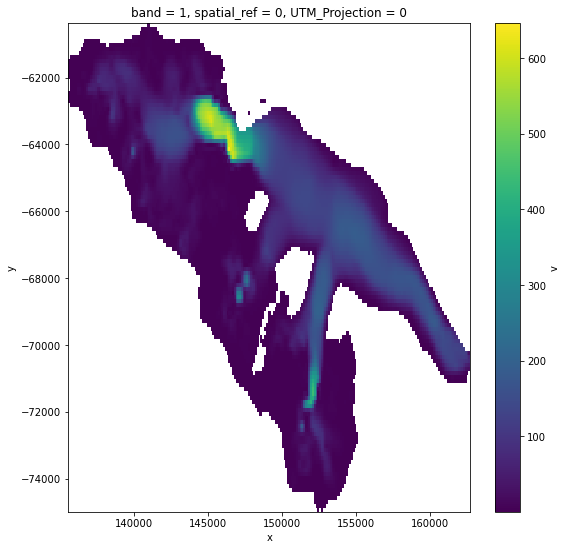

In [19]:
fig, ax = plt.subplots(figsize=(9,9))

just_ice.v.plot(ax=ax)

## Extract glacier centerline (trying to in a more xarray-like way)

In [20]:
from skimage.morphology import skeletonize 

xarray.core.dataarray.DataArray

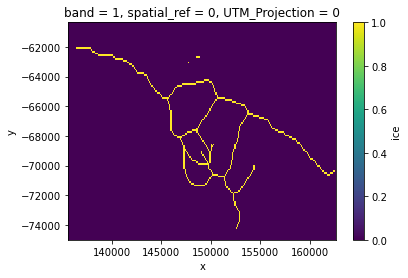

In [92]:
centerline_test = just_ice.ice.reduce(skeletonize)
centerline_test.plot()
type(centerline_test)

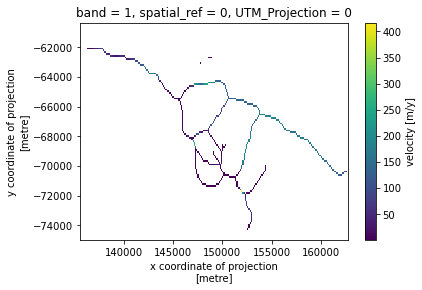

In [95]:
centerline_test_ds = glacier_raster.where(centerline_test != False)
centerline_test_ds.v.plot()

In [99]:
glacier_dict = {'full':glacier_raster,
                'clipped_to_ice': just_ice,
                'centerline': centerline_test_ds}

In [100]:
glacier_dict['clipped_to_ice']

<xarray.Dataset>
Dimensions:         (y: 122, x: 226)
Coordinates:
  * y               (y) float64 -6.041e+04 -6.053e+04 ... -7.481e+04 -7.493e+04
  * x               (x) float64 1.357e+05 1.358e+05 ... 1.625e+05 1.627e+05
    band            int64 1
    spatial_ref     int64 0
    UTM_Projection  int64 0
Data variables: (12/13)
    vx              (y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    chip_size_max   (y, x) float64 nan nan nan nan nan ... nan nan nan nan nan
    ocean           (y, x) float64 nan nan nan nan nan ... nan nan nan nan nan
    rock            (y, x) float64 nan nan nan nan nan ... nan nan nan nan nan
    ice             (y, x) float64 nan nan nan nan nan ... nan nan nan nan nan
    vy              (y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    ...              ...
    vx_err          (y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    vy_err          (y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    v_err           (y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    date            (y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    dt              (y, x) float64 nan nan nan nan nan ... nan nan nan nan nan
    count           (y, x) float64 nan nan nan nan nan ... nan nan nan nan nan

## Extract glacier centerline (original way)

In [22]:
skeleton_ice = skeletonize(just_ice.ice.data)
skeleton_ice_lee = skeletonize(just_ice.ice.data)

Compare different skeletonize algorithms:

<bound method Figure.show of <Figure size 1008x288 with 3 Axes>>

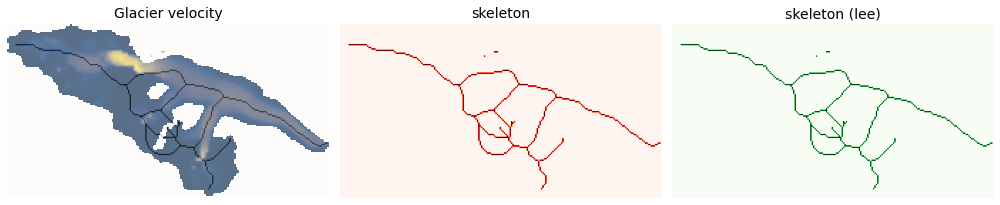

In [23]:
fig, axes = plt.subplots(ncols=3, figsize = (14,4), sharex=True, sharey=True)

ax = axes.ravel()

ax[0].imshow(just_ice.v, cmap=plt.cm.cividis)
ax[0].axis('off')
ax[0].set_title('Glacier velocity', fontsize=14)
ax[0].imshow(skeleton_ice, cmap=plt.cm.Reds, alpha = 0.2)
ax[0].imshow(skeleton_ice_lee, cmap=plt.cm.Greens, alpha = 0.2)


ax[1].imshow(skeleton_ice, cmap=plt.cm.Reds)
ax[1].axis('off')
ax[1].set_title('skeleton', fontsize=14)

ax[2].imshow(skeleton_ice_lee, cmap=plt.cm.Greens)
ax[2].axis('off')
ax[2].set_title('skeleton (lee)', fontsize=14)

fig.tight_layout()
fig.show

## Make xarray object out of centerline bool mask
- should have the same coords as the velocity xarray object

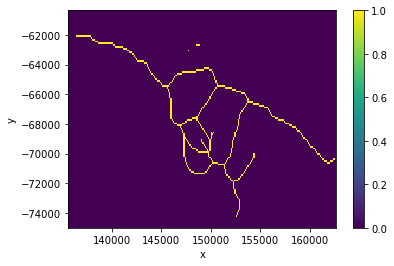

In [59]:
centerline_da = xr.DataArray(
    skeleton_ice,
    dims=("y", "x"),
    coords={
        "x": glacier_raster.coords['x'].data,
        "y": glacier_raster.coords['y'].data}
)


centerline_da.plot()

In [60]:
centerline_da

<xarray.DataArray (y: 122, x: 226)>
array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])
Coordinates:
  * x        (x) float64 1.357e+05 1.358e+05 1.359e+05 ... 1.625e+05 1.627e+05
  * y        (y) float64 -6.041e+04 -6.053e+04 ... -7.481e+04 -7.493e+04

### Extract itslive xarray dataset data only at points along centerline
- this should return a dataset with the same data vars but only data along centerline

In [61]:
centerline_ds = glacier_raster.where(da != False)

In [62]:
centerline_ds

<xarray.Dataset>
Dimensions:         (y: 122, x: 226)
Coordinates:
  * y               (y) float64 -6.041e+04 -6.053e+04 ... -7.481e+04 -7.493e+04
  * x               (x) float64 1.357e+05 1.358e+05 ... 1.625e+05 1.627e+05
    band            int64 1
    spatial_ref     int64 0
    UTM_Projection  int64 0
Data variables: (12/13)
    vx              (y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    chip_size_max   (y, x) float64 nan nan nan nan nan ... nan nan nan nan nan
    ocean           (y, x) float64 nan nan nan nan nan ... nan nan nan nan nan
    rock            (y, x) float64 nan nan nan nan nan ... nan nan nan nan nan
    ice             (y, x) float64 nan nan nan nan nan ... nan nan nan nan nan
    vy              (y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    ...              ...
    vx_err          (y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    vy_err          (y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    v_err           (y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    date            (y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    dt              (y, x) float64 nan nan nan nan nan ... nan nan nan nan nan
    count           (y, x) float64 nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    author:                   Alex S. Gardner, JPL/NASA
    date_created:             08-May-2019 13:31:28
    GDAL_AREA_OR_POINT:       Area
    institution:              NASA Jet Propulsion Laboratory (JPL), Californi...
    motion_coordinates:       map
    motion_detection_method:  feature
    scene_pair_type:          optical
    title:                    autoRIFT surface velocities

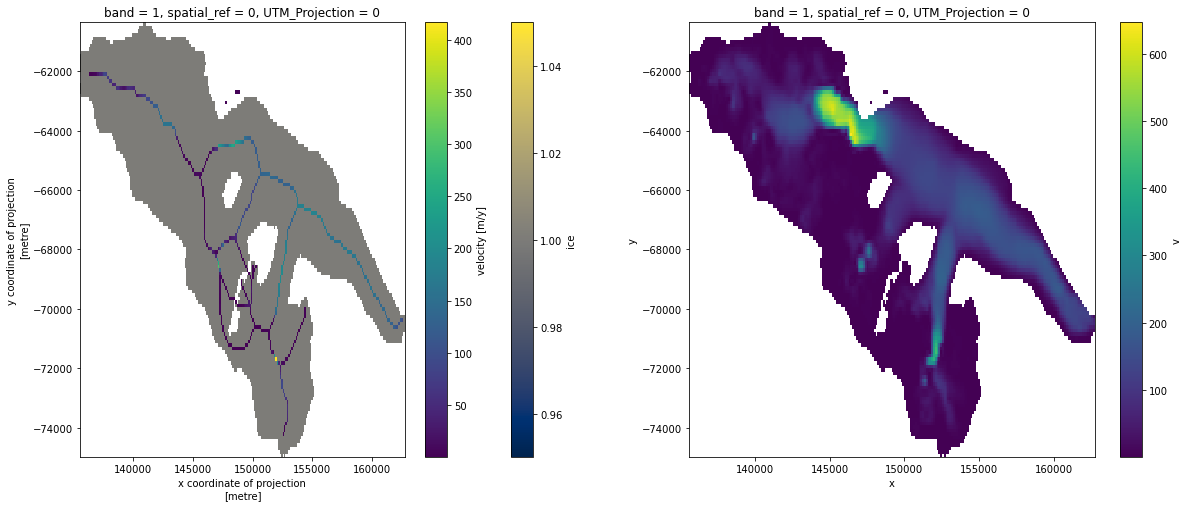

In [63]:
fig, axs = plt.subplots(ncols = 2, figsize=(20,8))
just_ice.ice.plot(ax=axs[0], cmap=plt.cm.cividis)
centerline_ds.v.plot(ax=axs[0])

just_ice.v.plot(ax=axs[1])

### Experimenting with skeletonize v. thin (scikit image)

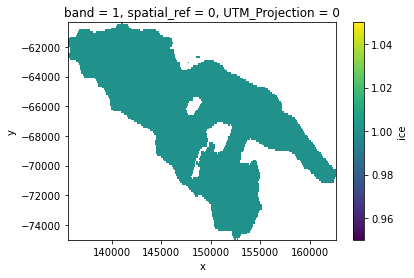

In [84]:
just_ice.ice.plot()

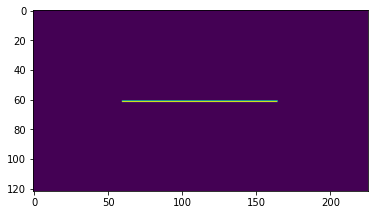

In [87]:
from skimage.morphology import skeletonize, thin

thinned = thin(just_ice.ice)
#thinned_partial = thin(just_ice.ice.data, max_num_iter = 50)

plt.imshow(thinned)

(-0.5, 225.5, 121.5, -0.5)

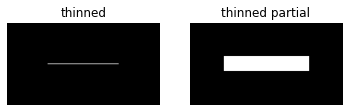

In [75]:
fig, axs = plt.subplots(ncols=2)

axs[0].imshow(thinned, cmap=plt.cm.gray)
axs[0].set_title('thinned')
axs[0].axis('off')

axs[1].imshow(thinned_partial, cmap=plt.cm.gray)
axs[1].set_title('thinned partial')
axs[1].axis('off')

